# Module 2 Project: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as pyo
from string import ascii_letters
from statsmodels.formula.api import ols
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
with open('new_df.pkl', 'rb') as pickle_file:
    new_df = pickle.load(pickle_file)

In [3]:
with open('stan_df.pkl', 'rb') as pickle_file:
    stan_df = pickle.load(pickle_file)

In [4]:
new_df.head()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,yr_built,yr_renovated,pop_bin,sqft_non_living,box_cox_condition,living_fraction
0,2.25,3.0,3.0,2.0,7.0,257500.0,1715.0,0.0,1715.0,6819.0,0.0,1995.0,0.0,4.0,5104.0,0.936034,0.251503
1,1.00,2.0,4.0,1.0,7.0,189000.0,1200.0,0.0,1200.0,9850.0,0.0,1921.0,0.0,5.0,8650.0,1.134321,0.121827
2,2.75,5.0,3.0,2.0,9.0,861990.0,3595.0,0.0,3595.0,5639.0,0.0,2014.0,0.0,1.0,2044.0,0.936034,0.637524
3,2.50,4.0,3.0,2.0,10.0,720000.0,3450.0,0.0,3450.0,39683.0,0.0,2002.0,0.0,1.0,36233.0,0.936034,0.086939
4,1.75,3.0,4.0,1.0,7.0,272500.0,1160.0,380.0,1540.0,12600.0,0.0,1980.0,0.0,1.0,11060.0,1.134321,0.122222


In [5]:
stan_df.head()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,yr_built,yr_renovated,pop_bin,sqft_non_living,box_cox_condition,living_fraction
0,0.174461,-0.411272,-0.629946,0.937385,-0.560817,-0.769779,-0.088954,-0.658992,-0.397934,-0.199959,-0.304956,0.817001,-0.188886,-0.243266,-0.191829,-0.599658,-0.269146
1,-1.451069,-1.517353,0.907438,-0.915591,-0.560817,-0.956241,-0.711127,-0.658992,-0.958874,-0.126769,-0.304956,-1.702167,-0.188886,0.104560,-0.105893,0.980510,-0.752182
2,0.824672,1.800890,-0.629946,0.937385,1.143935,0.875685,2.182279,-0.658992,1.649772,-0.228453,-0.304956,1.463814,-0.188886,-1.286744,-0.265987,-0.599658,1.168765
3,0.499567,0.694809,-0.629946,0.937385,1.996311,0.489178,2.007104,-0.658992,1.491837,0.593616,-0.304956,1.055300,-0.188886,-1.286744,0.562571,-0.599658,-0.882140
4,-0.475751,-0.411272,0.907438,-0.915591,-0.560817,-0.728948,-0.759452,0.199448,-0.588545,-0.060364,-0.304956,0.306358,-0.188886,-1.286744,-0.047487,0.980510,-0.750711


### Distribution of variables can be inspected.

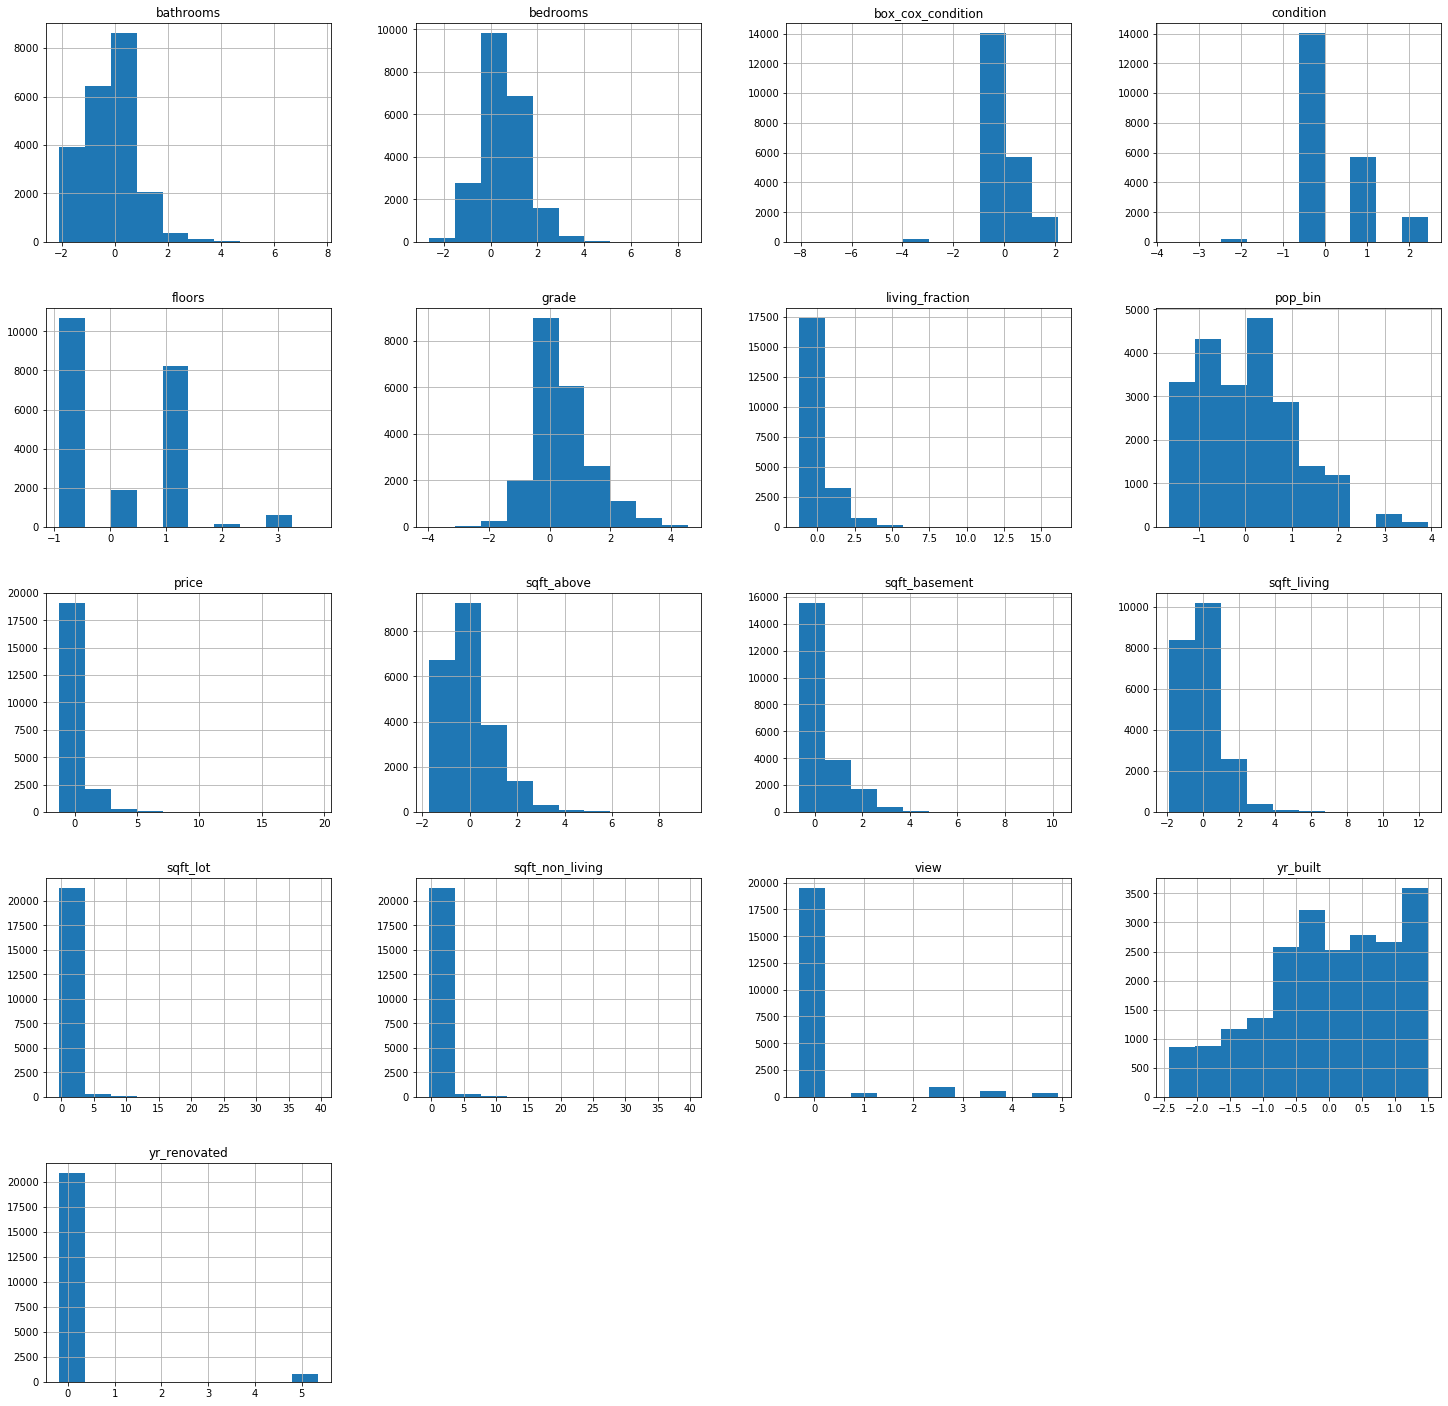

In [6]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
stan_df.hist(ax = ax);

### The relationships between input variables and property price can be analysed.

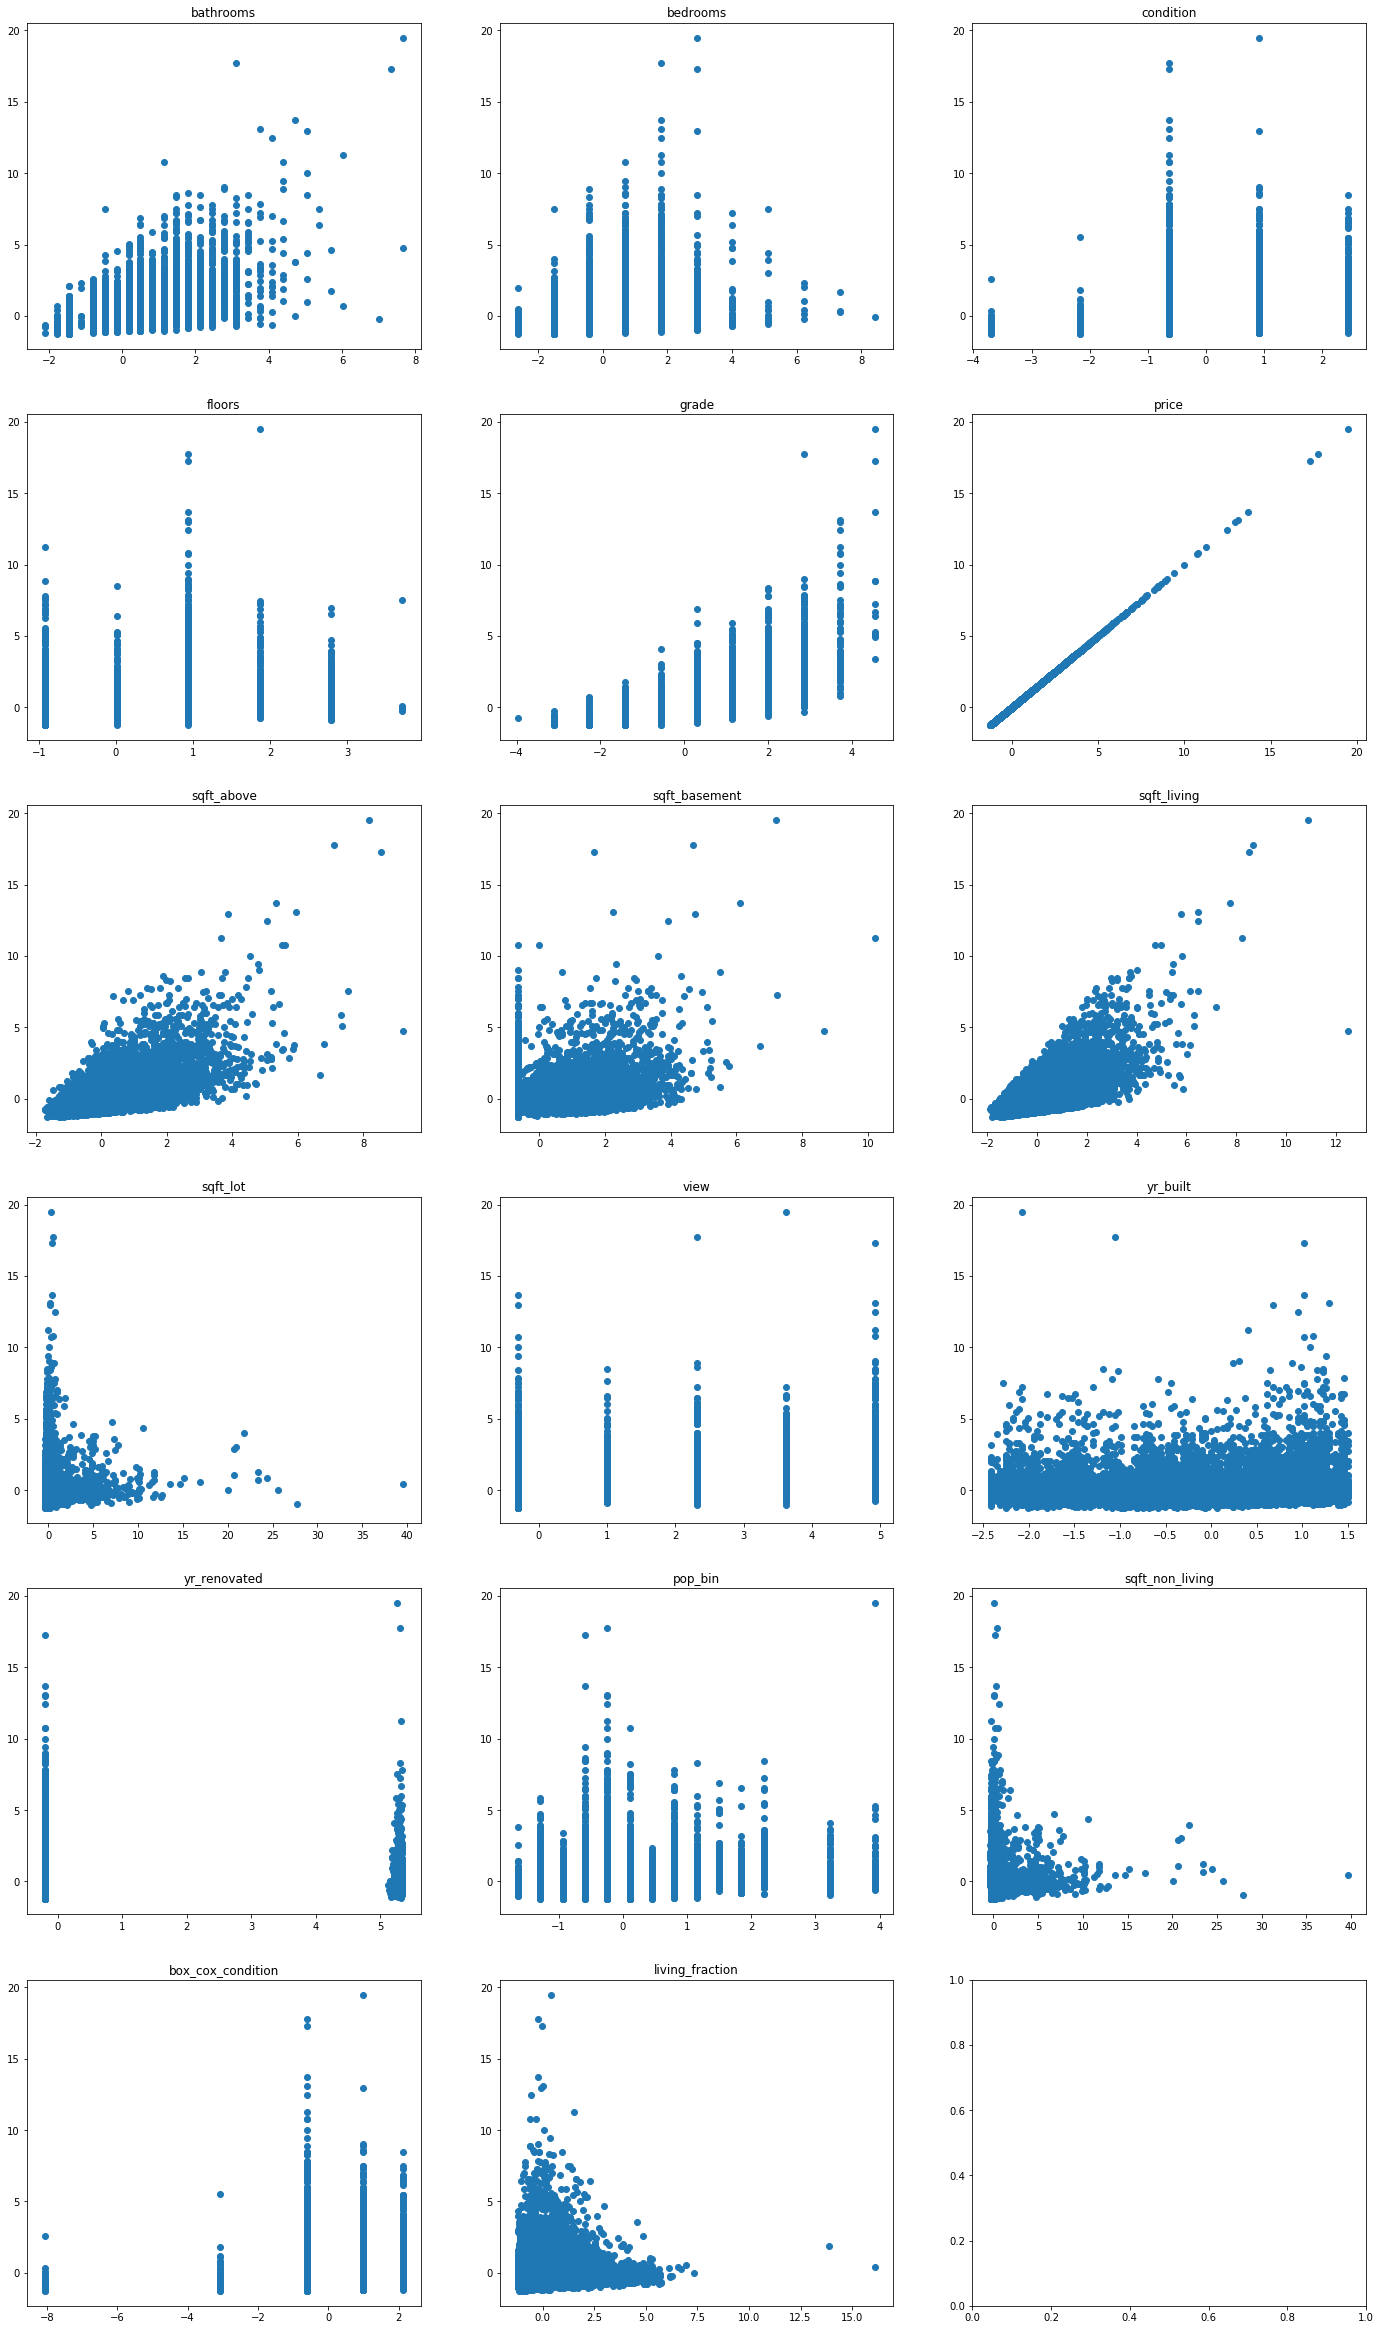

In [7]:
fig, axs = plt.subplots(6,3)
fig.set_figwidth(24)
fig.set_figheight(42)
for ax, col in zip(axs.flat, stan_df.columns):
    try:
        ax.scatter(x=col, y='price', data=stan_df)
        ax.set_title(col)
    except:
        ax.set_title(col)
        continue

In [8]:
#breusch-pagan or cook-weisberg

# VIF testing will test for multicolinearity. 

VIF of greater than 5 indicates multicolinearity.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
stan_df.columns

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'sqft_non_living',
       'box_cox_condition', 'living_fraction'],
      dtype='object')

In [14]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'sqft_non_living',
       'box_cox_condition', 'living_fraction']

In [15]:
X = stan_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.4198539935175987),
 ('bedrooms', 1.7333787597563874),
 ('condition', 25.18730991001678),
 ('floors', 2.877339178131465),
 ('grade', 3.480493335268064),
 ('price', 2.908080106252036),
 ('sqft_above', inf),
 ('sqft_basement', inf),
 ('sqft_living', inf),
 ('sqft_lot', inf),
 ('view', 1.2431389780257645),
 ('yr_built', 2.853019218531945),
 ('yr_renovated', 1.1204260374702872),
 ('pop_bin', 2.0490369941003173),
 ('sqft_non_living', inf),
 ('box_cox_condition', 24.403915649077693),
 ('living_fraction', 2.379920694368773)]

### Eliminating condition, sqft_above, sqft_living, sqft_non_living

In [40]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'price', 'sqft_basement', 
          'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction']

In [41]:
X = stan_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.1222400105661974),
 ('bedrooms', 1.5273326991793972),
 ('floors', 2.7163418910628683),
 ('grade', 2.9026668924791954),
 ('price', 2.5169733264876673),
 ('sqft_basement', 1.7918571613710728),
 ('sqft_lot', 1.140265489508877),
 ('view', 1.2416920151933213),
 ('yr_built', 2.765945566342881),
 ('yr_renovated', 1.1122652999297293),
 ('pop_bin', 1.9122281070312706),
 ('box_cox_condition', 1.1866819074030968),
 ('living_fraction', 2.308711574210377)]

In [42]:
outliers_df = stan_df[x_cols]

In [43]:
outliers_df.head()

,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,living_fraction
0,0.174461,-0.411272,0.937385,-0.560817,-0.769779,-0.658992,-0.199959,-0.304956,0.817001,-0.188886,-0.243266,-0.599658,-0.269146
1,-1.451069,-1.517353,-0.915591,-0.560817,-0.956241,-0.658992,-0.126769,-0.304956,-1.702167,-0.188886,0.104560,0.980510,-0.752182
2,0.824672,1.800890,0.937385,1.143935,0.875685,-0.658992,-0.228453,-0.304956,1.463814,-0.188886,-1.286744,-0.599658,1.168765
3,0.499567,0.694809,0.937385,1.996311,0.489178,-0.658992,0.593616,-0.304956,1.055300,-0.188886,-1.286744,-0.599658,-0.882140
4,-0.475751,-0.411272,-0.915591,-0.560817,-0.728948,0.199448,-0.060364,-0.304956,0.306358,-0.188886,-1.286744,0.980510,-0.750711


# Outliers can be removed using  IQR score.

In [44]:
Q1 = outliers_df.quantile(0.25)
Q3 = outliers_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bathrooms            0.975318
bedrooms             1.106081
floors               1.852976
grade                0.852376
price                0.879229
sqft_basement        1.265069
sqft_lot             0.136323
view                 0.000000
yr_built             1.565969
yr_renovated         0.000000
pop_bin              1.391304
box_cox_condition    1.580169
living_fraction      0.934836
dtype: float64


### 'True' represents the presence of an outlier.

In [50]:
print(outliers_df < (Q1 - 1.5 * IQR)) or (outliers_df > (Q3 + 1.5 * IQR))

       bathrooms  bedrooms  floors  grade  price  sqft_basement  sqft_lot  \
0          False     False   False  False  False          False     False   
1          False     False   False  False  False          False     False   
2          False     False   False  False  False          False     False   
3          False     False   False  False  False          False     False   
4          False     False   False  False  False          False     False   
...          ...       ...     ...    ...    ...            ...       ...   
21591      False     False   False  False  False          False     False   
21592      False     False   False  False  False          False     False   
21593      False     False   False  False  False          False     False   
21594      False     False   False  False  False          False     False   
21595      False     False   False  False  False          False     False   

        view  yr_built  yr_renovated  pop_bin  box_cox_condition  \
0      

,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,living_fraction
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,False,False,False,False,False,False,False,False,False,False,False,False,True
21592,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False


### Outliers can be removed.

In [51]:
stan_df_out = outliers_df[~((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
stan_df_out.shape


(13928, 13)

# Train-Test data split can be performed.

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(stan_df_out, test_size=0.3)

In [53]:
test.shape

(4179, 13)

In [54]:
train.shape

(9749, 13)

# An initial model can be fit.

In [55]:
train.head()

,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,living_fraction
18157,-1.451069,-1.517353,-0.915591,-1.413193,-0.979379,-0.658992,-0.243883,-0.304956,0.170187,-0.188886,0.104560,-0.599658,-0.572741
18901,-1.451069,-1.517353,-0.915591,-1.413193,-0.368274,-0.658992,-0.219349,-0.304956,-0.987268,-0.188886,1.148039,-0.599658,-0.710644
18694,-0.475751,1.800890,-0.915591,-0.560817,-0.273138,1.374155,-0.183515,-0.304956,0.272316,-0.188886,0.800213,-0.599658,-0.118297
20293,1.799990,0.694809,0.937385,1.143935,0.666112,-0.658992,-0.247505,-0.304956,1.327643,-0.188886,-1.286744,-0.599658,1.336202
8099,-0.800857,0.694809,0.937385,-0.560817,-0.221282,-0.658992,-0.133216,-0.304956,-0.272369,-0.188886,0.104560,0.980510,-0.420801


In [56]:
train.columns

Index(['bathrooms', 'bedrooms', 'floors', 'grade', 'price', 'sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction'],
      dtype='object')

In [60]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction']

In [61]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     939.1
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:37:12   Log-Likelihood:                -3711.4
No. Observations:                9749   AIC:                             7445.
Df Residuals:                    9738   BIC:                             7524.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0755      0.014      5.331      0.000       0.048       0.103
bathrooms             0.0865      0.007     11.576      0.000       0.072       0.101
bedrooms              0.0062      0.005      1.205      0.228      -0.004       0.016
floors                0.0090      0.007      1.338      0.181      -0.004       0.022
grade                 0.3784      0.007     53.138      0.000       0.364       0.392
sqft_basement         0.0056      0.006      0.924      0.356      -0.006       0.017
sqft_lot              1.1773      0.084     14.090      0.000       1.014       1.341
view                 -0.0230      0.004     -5.331      0.000      -0.031      -0.015
yr_built             -0.1719      0.007    -26.402      0.000      -0.185      -0.159
yr_renovated         -0.0143      0.003     -5.331      0.000      -0.020      -0.009
pop_bin               0.1002      0.006     17.082      0.000       0.089       0.112
box_cox_condition     0.0380      0.004      8.857      0.000       0.030       0.046
living_fraction       0.2743      0.014     20.267      0.000       0.248       0.301
==============================================================================
Omnibus:                      702.616   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.911
Skew:                           0.569   Prob(JB):                    1.31e-242
Kurtosis:                       4.203   Cond. No.                     7.17e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Checking for normality can be completed.

Verification of the normal distribution of model residuals.



skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

In [75]:
import statsmodels.api as sm
import scipy.stats as stats

In [76]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction']

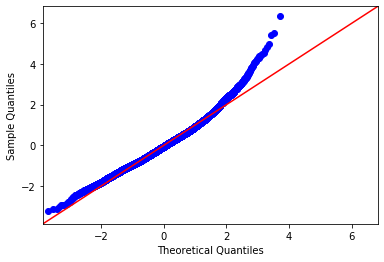

In [77]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [62]:
train.columns

Index(['bathrooms', 'bedrooms', 'floors', 'grade', 'price', 'sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction'],
      dtype='object')

In [70]:
train.view.skew()

0

In [71]:
train.yr_renovated.skew()

0

In [63]:
train.bathrooms.skew()

-0.08679469604583015

In [65]:
train.bedrooms.skew()

0.1937574963065836

In [67]:
train.grade.skew()

0.3940664617404127

In [73]:
train.pop_bin.skew()

0.40588824705553367

In [72]:
train.yr_built.skew()

-0.3984166985703998

In [66]:
train.floors.skew()

0.5634789785641423

In [69]:
train.sqft_lot.skew()

0.8473391947709148

In [64]:
train.box_cox_condition.skew()

0.8664073647748909

In [74]:
train.living_fraction.skew()

1.0169692703087796

In [68]:
train.sqft_basement.skew()

1.300833998148221

### Altering the square foot basement feature into its square root reduces the skew.

In [80]:
train['sqrt_sqft_basement'] = np.sqrt(train['sqft_basement'])
train.sqrt_sqft_basement.skew()

-0.32775329028552197

In [83]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqrt_sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction']

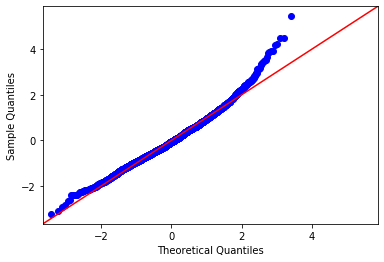

In [84]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [87]:
### Altering the living_fraction feature into its square root reduces the skew.

In [88]:
train['sqrt_living_fraction'] = np.sqrt(train['living_fraction'])
train.sqrt_living_fraction.skew()

-0.005086287188249111

In [96]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqrt_sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'sqrt_living_fraction']

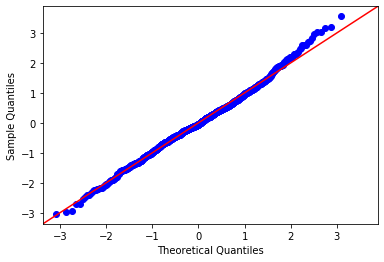

In [90]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [112]:
df_for_hetero = train[['bathrooms', 'bedrooms', 'floors', 'grade', 'sqrt_sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'sqrt_living_fraction']]

In [116]:
train.isna().sum()

bathrooms                    0
bedrooms                     0
floors                       0
grade                        0
price                        0
sqft_basement                0
sqft_lot                     0
view                         0
yr_built                     0
yr_renovated                 0
pop_bin                      0
box_cox_condition            0
living_fraction              0
log_sqft_basement         6704
sqrt_sqft_basement        6704
sqrt_living_fraction      6626
sqrt_sqft_lot             9453
sqrt_floors               5493
sqrt_box_cox_condition    6097
dtype: int64

In [113]:
df_for_hetero.head()

,bathrooms,bedrooms,floors,grade,sqrt_sqft_basement,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,sqrt_living_fraction
18157,-1.451069,-1.517353,-0.915591,-1.413193,NaN,-0.243883,-0.304956,0.170187,-0.188886,0.104560,-0.599658,NaN
18901,-1.451069,-1.517353,-0.915591,-1.413193,NaN,-0.219349,-0.304956,-0.987268,-0.188886,1.148039,-0.599658,NaN
18694,-0.475751,1.800890,-0.915591,-0.560817,1.172244,-0.183515,-0.304956,0.272316,-0.188886,0.800213,-0.599658,NaN
20293,1.799990,0.694809,0.937385,1.143935,NaN,-0.247505,-0.304956,1.327643,-0.188886,-1.286744,-0.599658,1.155942
8099,-0.800857,0.694809,0.937385,-0.560817,NaN,-0.133216,-0.304956,-0.272369,-0.188886,0.104560,0.980510,NaN
